In [1]:
# Import necessary libraries
import pandas as pd                         # Pandas is a data manipulation and analysis library.
import tensorflow as tf                     # TensorFlow is an open-source machine learning library.
import os                                  # Operating system-related functionality.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Keras ImageDataGenerator for data augmentation.
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets.
import matplotlib.pyplot as plt            # Plotting library.
from mpl_toolkits.axes_grid1 import ImageGrid  # Toolkit for creating image grids.
from pathlib import Path                   # Path manipulation library.
from PIL import Image                      # Python Imaging Library for image processing.
import cv2                                 # OpenCV library for computer vision tasks.
from tensorflow.keras import layers        # Layers module from Keras for building neural networks.
from sklearn import preprocessing          # Scikit-learn library for preprocessing tasks.
import splitfolders                        # Library for splitting data into train, validation, and test sets.
from tensorflow.keras.utils import to_categorical  # Utility function for one-hot encoding.
import numpy as np                          # Numerical computing library.
from tensorflow.keras.preprocessing import image  # Keras image preprocessing module.
import matplotlib.pyplot as plt            # Plotting library.

In [2]:
image_link = list(Path(r'D:\messina\New folder\Rice_Classification-main\Rice_Classification-main\20_noise_test_dataset').glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

In [3]:
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype=str)
df['name'] = image_name
df['label'] = image_label

In [4]:
df

,link,name,label
0,D:\messina\New folder\Rice_Classification-main...,Arborio,0
1,D:\messina\New folder\Rice_Classification-main...,Arborio,0
2,D:\messina\New folder\Rice_Classification-main...,Arborio,0
3,D:\messina\New folder\Rice_Classification-main...,Arborio,0
4,D:\messina\New folder\Rice_Classification-main...,Arborio,0
...,...,...,...
14995,D:\messina\New folder\Rice_Classification-main...,Karacadag,4
14996,D:\messina\New folder\Rice_Classification-main...,Karacadag,4
14997,D:\messina\New folder\Rice_Classification-main...,Karacadag,4
14998,D:\messina\New folder\Rice_Classification-main...,Karacadag,4


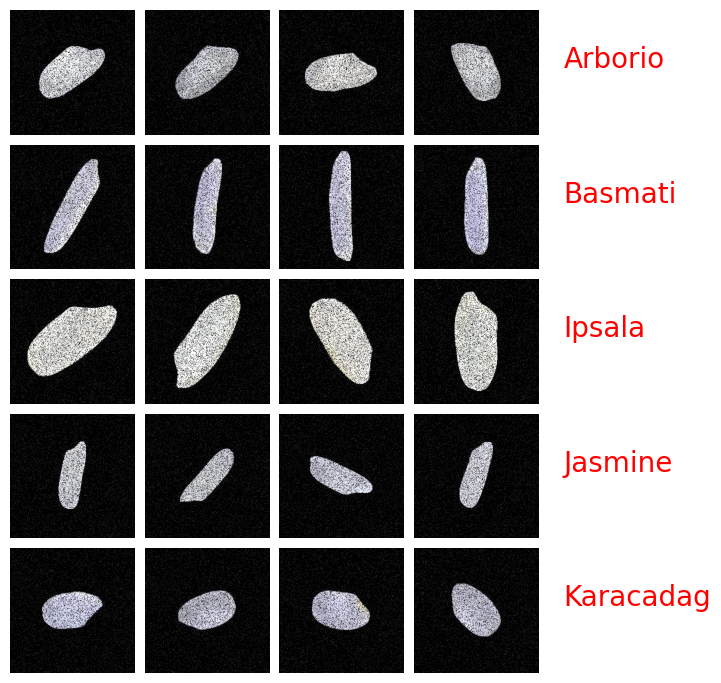

In [5]:
fig = plt.figure(1, figsize = (15,15))
grid = ImageGrid(fig, 121, nrows_ncols = (5,4), axes_pad = 0.10)
i = 0
for category_id, category in enumerate(df.name.unique()):
    for filepath in df[df['name'] == category]['link'].values[:4]:
        ax = grid[i]
        img = Image.open(filepath)
        ax.imshow(img)
        ax.axis('off')
        if i % 4 == 4-1:
            ax.text(300,100, category, verticalalignment = 'center', fontsize = 20, color ='red')
        i+=1
        
plt.show()

In [6]:
# ImageDataGenerator for training without data augmentation
#train_datagen = ImageDataGenerator(rescale=1./255)
# ImageDataGenerator for testing without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# # Create data generators
# train_images = train_datagen.flow_from_dataframe(
# dataframe=train_df,
# x_col='link',
# y_col='name',
# target_size=(250, 250),
# batch_size=32,
# class_mode='categorical',
# subset='training'
# )
test_images = test_datagen.flow_from_dataframe(
dataframe=df,
x_col='link',
y_col='name',
target_size=(250, 250),
batch_size=32,
class_mode='categorical',
shuffle=False
)

Found 15000 validated image filenames belonging to 5 classes.


In [8]:
from keras.models import load_model
# Load the pre-trained model
loaded_model = load_model(r'D:\messina\New folder\Rice_Classification-main\Rice_Classification-main\finalized_noise_proability.h5')


# Evaluate the model on the local test set
y_true = test_images.classes
y_pred_probabilities = loaded_model.predict(test_images)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probabilities, axis=1)



469/469 [==============================] - 321s 683ms/step


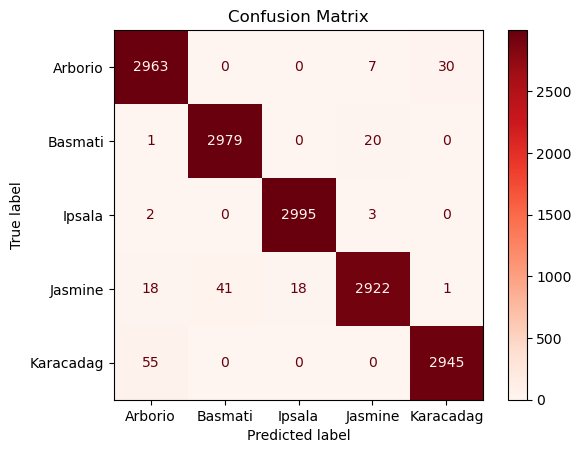

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Assuming 'y_true' and 'y_pred' are already defined
conf_matrix = confusion_matrix(y_true, y_pred)

# Define your class labels
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Plot confusion matrix with color
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
cm_display.plot(cmap='Reds')  # You can choose a different colormap if needed
plt.title('Confusion Matrix')
plt.show()

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import os
# Print classification report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3000
           1       0.99      0.99      0.99      3000
           2       0.99      1.00      1.00      3000
           3       0.99      0.97      0.98      3000
           4       0.99      0.98      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [11]:
# Calculate and print overall model performance score
performance_score = loaded_model.evaluate(test_images)
print("\nPerformance Score:")
print(f"Loss: {performance_score[0]}, Accuracy: {performance_score[1]}")

# If needed, you can further analyze metrics like precision, recall, and F1 score for individual classes using the values from the confusion matrix.



469/469 [==============================] - 147s 311ms/step - loss: 0.1187 - accuracy: 0.9869

Performance Score:
Loss: 0.11871158331632614, Accuracy: 0.9869333505630493


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming 'y_true' and 'y_pred' are already defined
y_true = test_images.classes
y_pred_probabilities = loaded_model.predict(test_images)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Define your class labels
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']



# Print classification report
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print("\nClassification Report:")
print(class_report)

# Calculate and print overall model performance score
performance_score = loaded_model.evaluate(test_images)
print("\nPerformance Score:")
print(f"Loss: {performance_score[0]}, Accuracy: {performance_score[1]}")


469/469 [==============================] - 163s 346ms/step
Confusion Matrix:
[[2963    0    0    7   30]
 [   1 2979    0   20    0]
 [   2    0 2995    3    0]
 [  18   41   18 2922    1]
 [  55    0    0    0 2945]]

Classification Report:
              precision    recall  f1-score   support

     Arborio       0.97      0.99      0.98      3000
     Basmati       0.99      0.99      0.99      3000
      Ipsala       0.99      1.00      1.00      3000
     Jasmine       0.99      0.97      0.98      3000
   Karacadag       0.99      0.98      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

469/469 [==============================] - 166s 354ms/step - loss: 0.1187 - accuracy: 0.9869

Performance Score:
Loss: 0.11871158331632614, Accuracy: 0.9869333505630493
